# Exploratory Data Analysis

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf


In [21]:
df = pd.read_csv("daily-website-visitors.csv")
df['Date'] = pd.to_datetime(df['Date'])
df

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,2014-09-14,"2,146","1,582","1,430",152
1,2,Monday,2,2014-09-15,"3,621","2,528","2,297",231
2,3,Tuesday,3,2014-09-16,"3,698","2,630","2,352",278
3,4,Wednesday,4,2014-09-17,"3,667","2,614","2,327",287
4,5,Thursday,5,2014-09-18,"3,316","2,366","2,130",236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,2020-08-15,"2,221","1,696","1,373",323
2163,2164,Sunday,1,2020-08-16,"2,724","2,037","1,686",351
2164,2165,Monday,2,2020-08-17,"3,456","2,638","2,181",457
2165,2166,Tuesday,3,2020-08-18,"3,581","2,683","2,184",499


## Plot the time series:

/Users/jean-sebastiengaultier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jean-sebastiengaultier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


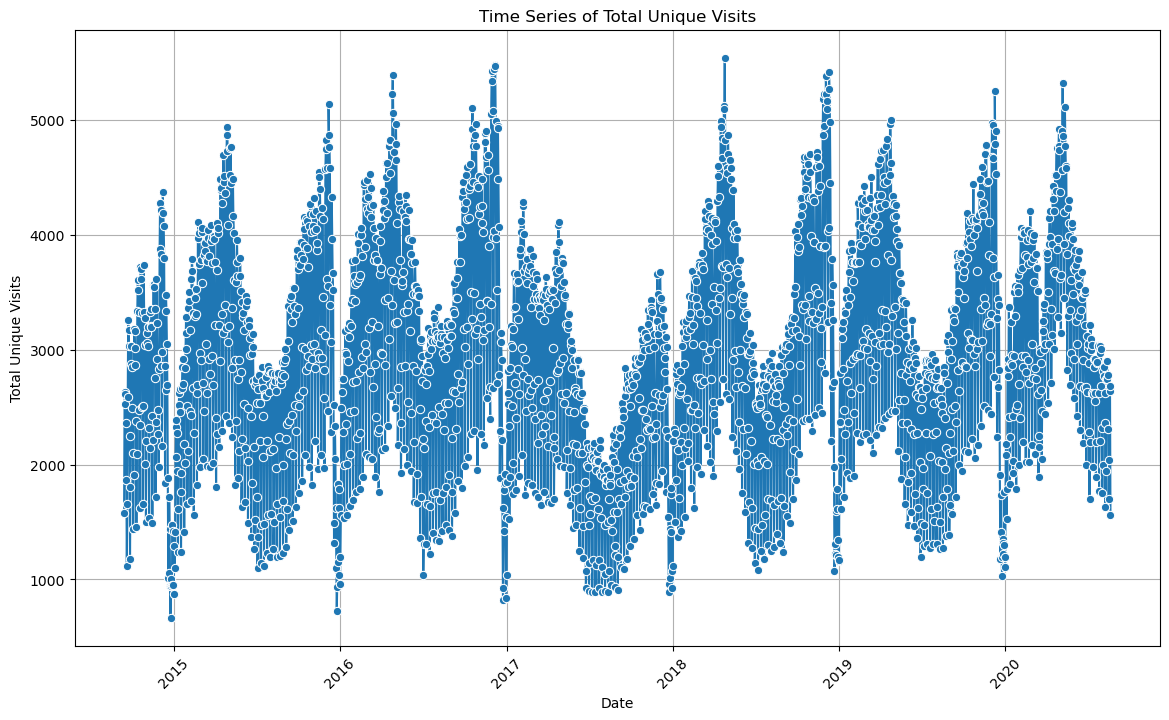

In [22]:
# Remove commas and convert 'Unique.Visits' to integer
df['Unique.Visits'] = df['Unique.Visits'].str.replace(',', '').astype(int)

# Group by 'Date' and sum the 'Unique.Visits'
daily_visits = df.groupby('Date')['Unique.Visits'].sum().reset_index()

# Plotting the time series
plt.figure(figsize=(14, 8))
sns.lineplot(data=daily_visits, x='Date', y='Unique.Visits', marker='o')

plt.title('Time Series of Total Unique Visits')
plt.xlabel('Date')
plt.ylabel('Total Unique Visits')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Plot the yearly time series

/Users/jean-sebastiengaultier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jean-sebastiengaultier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


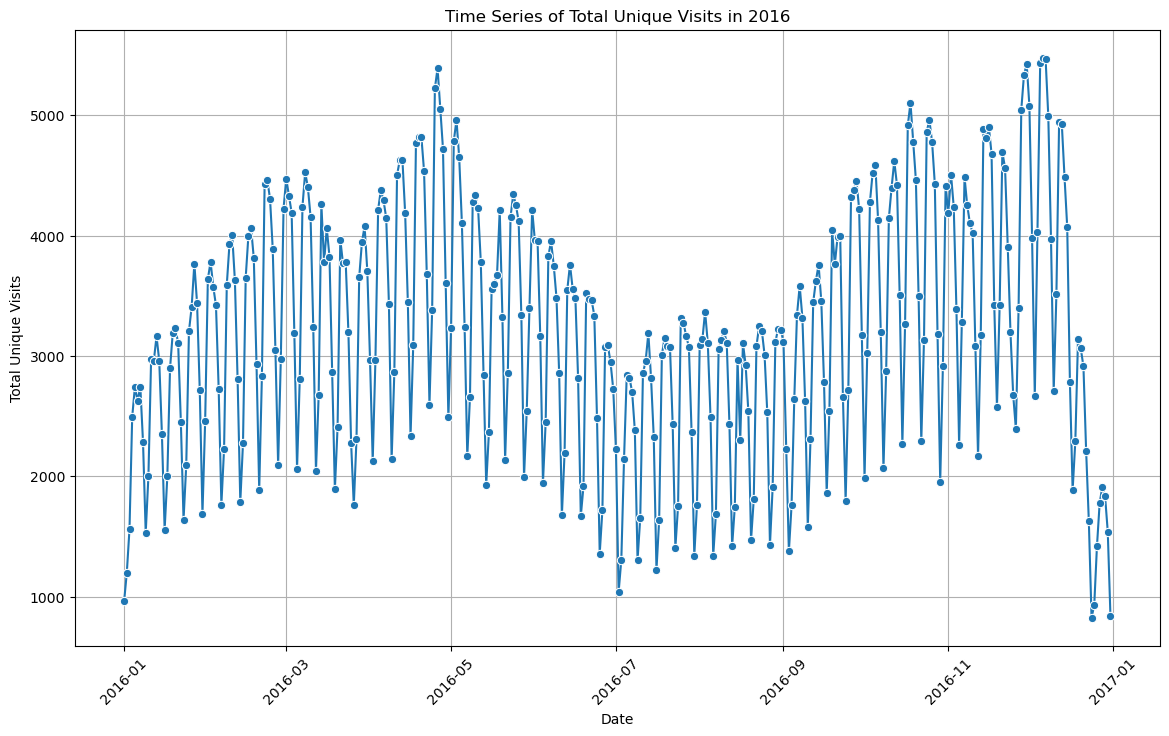

In [23]:
df_2016 = df[df['Date'].dt.year == 2016]

# Group by 'Date' and sum the 'Unique.Visits'
daily_visits_2016 = df_2016.groupby('Date')['Unique.Visits'].sum().reset_index()

# Plotting the time series for 2016
plt.figure(figsize=(14, 8))
sns.lineplot(data=daily_visits_2016, x='Date', y='Unique.Visits', marker='o')

plt.title('Time Series of Total Unique Visits in 2016')
plt.xlabel('Date')
plt.ylabel('Total Unique Visits')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Daily Histogram

/Users/jean-sebastiengaultier/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


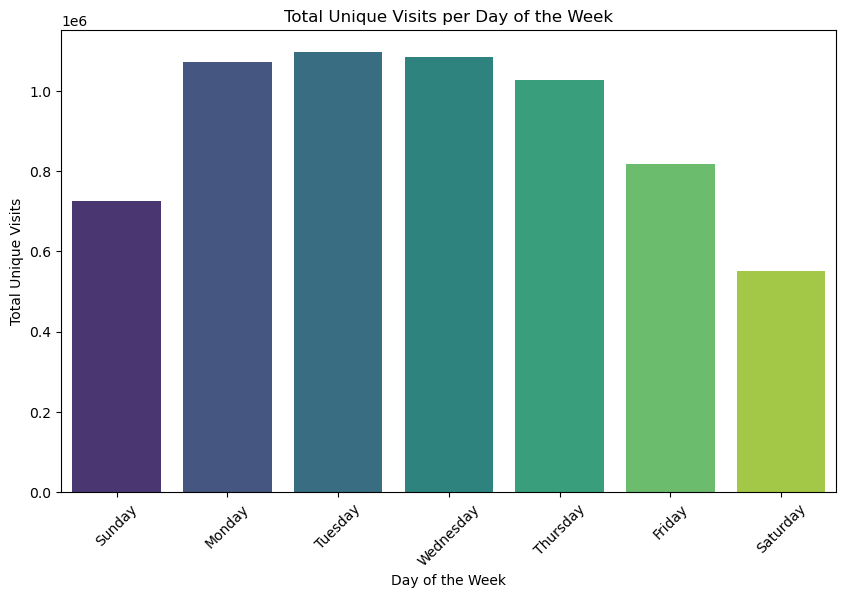

In [19]:
df['Unique.Visits'] = df['Unique.Visits'].str.replace(',', '').astype(int)

# Group by 'Day' and sum the 'Unique.Visits'
day_visits = df.groupby('Day')['Unique.Visits'].sum().reset_index()

# Order the days of the week
ordered_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_visits['Day'] = pd.Categorical(day_visits['Day'], categories=ordered_days, ordered=True)
day_visits = day_visits.sort_values('Day')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='Unique.Visits', data=day_visits, palette='viridis')

plt.title('Total Unique Visits per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Unique Visits')
plt.xticks(rotation=45)
plt.show()

## Stationnarity

/Users/jean-sebastiengaultier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jean-sebastiengaultier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


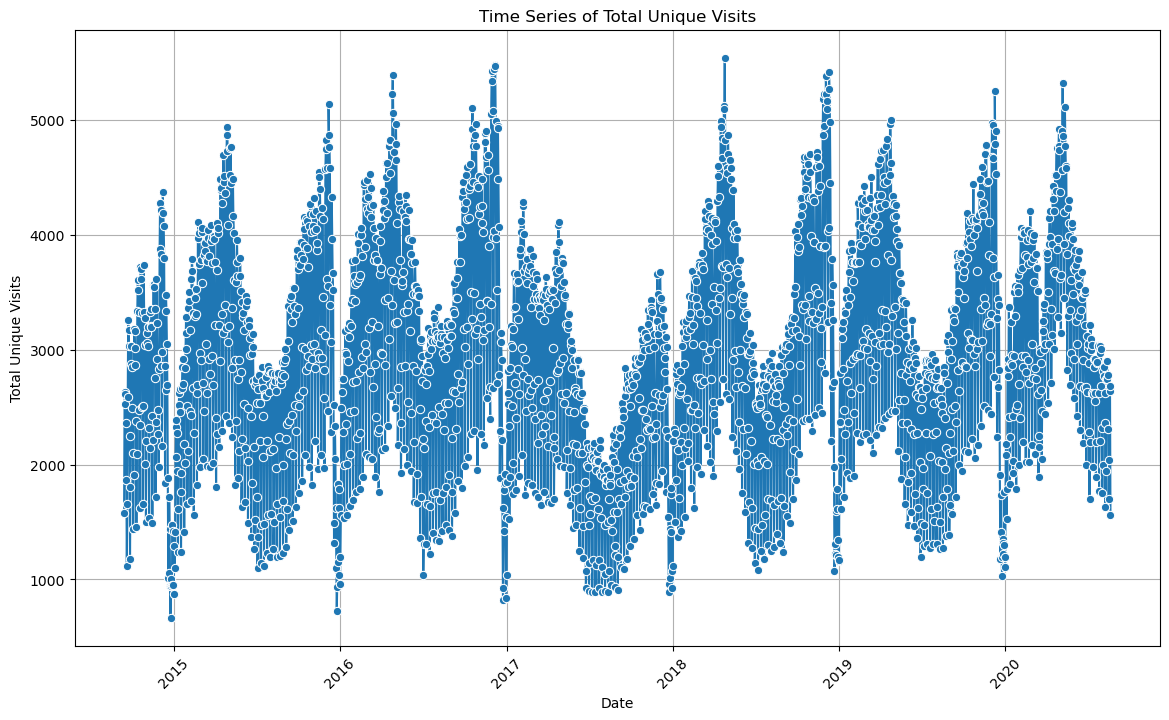

ADF Statistic: -4.475968574445405
p-value: 0.00021726409300080167
Critical Values:
   1%: -3.4334094211542983
   5%: -2.8628915360971003
   10%: -2.5674894918770197
The time series is stationary.


In [25]:
daily_visits = df.groupby('Date')['Unique.Visits'].sum().reset_index()

# Plotting the time series for the whole dataset
plt.figure(figsize=(14, 8))
sns.lineplot(data=daily_visits, x='Date', y='Unique.Visits', marker='o')
plt.title('Time Series of Total Unique Visits')
plt.xlabel('Date')
plt.ylabel('Total Unique Visits')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Perform the Augmented Dickey-Fuller test
result = adfuller(daily_visits['Unique.Visits'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

<Figure size 1400x600 with 0 Axes>

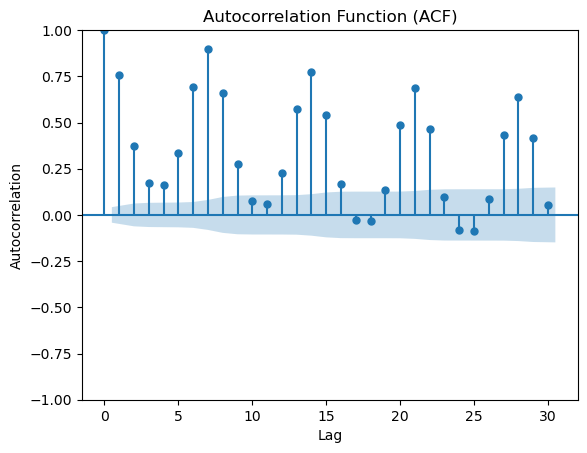

In [28]:
plt.figure(figsize=(14, 6))
plot_acf(daily_visits['Unique.Visits'], lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

## Working with Missing Values and Outliers

In [29]:
nan_count = df.isna().sum()

print(nan_count)

Row                  0
Day                  0
Day.Of.Week          0
Date                 0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64
